## Fashion MNIST- CNN Model Prediction using Tensorflow,Keras- Part 1

### Brief Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

### Data Description

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below. 

### Get the Data

You can use direct links to download the dataset.

| Name  | Content | Examples | Size | Link | MD5 Checksum|
| --- | --- |--- | --- |--- |--- |
| `train-images-idx3-ubyte.gz`  | training set images  | 60,000|26 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz)|`8d4fb7e6c68d591d4c3dfef9ec88bf0d`|
| `train-labels-idx1-ubyte.gz`  | training set labels  |60,000|29 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz)|`25c81989df183df01b3e8a0aad5dffbe`|
| `t10k-images-idx3-ubyte.gz`  | test set images  | 10,000|4.3 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz)|`bef4ecab320f06d8554ea6380940ec79`|
| `t10k-labels-idx1-ubyte.gz`  | test set labels  | 10,000| 5.1 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz)|`bb300cfdad3c16e7a12a480ee83cd310`|

Alternatively, you can clone this GitHub repository; the dataset appears under `data/fashion`. This repo also contains some scripts for benchmark and visualization.
   
```bash
git clone git@github.com:zalandoresearch/fashion-mnist.git
```

#### Labels

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot 

#### TL;DR

* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

### Acknowledgements

* Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

* Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

### Import Libraries

In [18]:
# Import Pandas for data manipulation using dataframes
import pandas as pd

#Import Numpy for statistical calculations
import numpy as np

# Import Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import matplotlib Library for data visualisation
import matplotlib.pyplot as plt

#Import train_test_split from scikit library
from sklearn.model_selection import train_test_split

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [2]:
# Create dataframes for train and test datasets

train_df = pd.read_csv('./data/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('./data/fashion-mnist_test.csv', sep = ',')

Let us explore the train and test data

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now it is observed that the first column is the label data and because it has 10 classes so it is going to have from 0 to 9.The remaining columns are the actual pixel data.Here as you can see there are about 784 columns that contain pixel data.
Here each row is a different image representation in the form pixel data.

Now let us split the train data into x and y arrays where x represents the image data and y represents the labels.
To do that we need to convert the dataframes into numpy arrays of float32 type which is the acceptable form for tensorflow and keras.

In [5]:
train_data = np.array(train_df, dtype = 'float32')

Similarly let us do the same process for test data

In [6]:
test_data = np.array(test_df, dtype='float32')

Now let us slice the train arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_train contains all the rows and all columns except the label column and excluding header info .
- y_train contains all the rows and first column and excluding header info .


Similarly slice the test arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_test contains all the rows and all columns except the label column and excluding header info .
- y_test contains all the rows and first column and excluding header info .

####  Important Note : Since the image data in x_train and x_test is from 0 to 255 ,  we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 

In [7]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

Now we are gonna split the training data into validation and actual training data for training the model and testing it using the validation set. This is achieved using the train_test_split method of scikit learn library.

In [8]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

Now let us visualise the sample image how it looks like in 28 * 28 pixel size

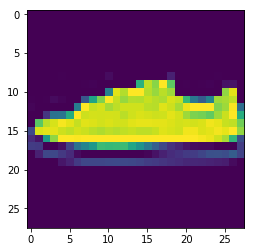

In [9]:
image = x_train[50,:].reshape((28,28))
plt.imshow(image)
plt.show()

As you can observe above the shape of shoe from the sample image

### Create the Convolutional Neural Networks (CNN)

- #### Define the model
- #### Compile the model
- #### Fit the model

First of all let us define the shape of the image before we define the model


In [10]:
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1) # Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation


Now we need to do more formating on the x_train,x_test and x_validate sets.

In [11]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)


Let us now print the shape of x_train,x_test and x_validate so see how they look like

In [12]:
print("x_train shape = {}".format(x_train.shape))
print("x_test shape = {}".format(x_test.shape))
print("x_validate shape = {}".format(x_validate.shape))

x_train shape = (48000, 28, 28, 1)
x_test shape = (10000, 28, 28, 1)
x_validate shape = (12000, 28, 28, 1)


- #### Define the model 

In [13]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

- #### Compile the model

In [14]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

Now let us now look at how we can specify some callbacks for tensorboard so that we can log some data to a file and look at it using the tensorboard

In [15]:
tensorboard = TensorBoard(
  log_dir = r'logs\{}'.format('cnn_1layer'),
  write_graph = True,
  write_grads = True,
  histogram_freq=1,
  write_images = True
)

- #### Fit the model

In [16]:
cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=1,
    validation_data=(x_validate,y_validate),
    callbacks = [tensorboard]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 41s 858us/step - loss: 0.7907 - acc: 0.7335 - val_loss: 0.4944 - val_acc: 0.8185
Epoch 2/10
48000/48000 [==============================] - 44s 913us/step - loss: 0.4544 - acc: 0.8407 - val_loss: 0.4112 - val_acc: 0.8595
Epoch 3/10
48000/48000 [==============================] - 39s 811us/step - loss: 0.3967 - acc: 0.8620 - val_loss: 0.3694 - val_acc: 0.8751
Epoch 4/10
48000/48000 [==============================] - 39s 808us/step - loss: 0.3613 - acc: 0.8738 - val_loss: 0.3464 - val_acc: 0.8799
Epoch 5/10
48000/48000 [==============================] - 39s 816us/step - loss: 0.3457 - acc: 0.8783 - val_loss: 0.3431 - val_acc: 0.8822
Epoch 6/10
48000/48000 [==============================] - 40s 831us/step - loss: 0.3266 - acc: 0.8837 - val_loss: 0.3158 - val_acc: 0.8898
Epoch 7/10
48000/48000 [==============================] - 41s 846us/step - loss: 0.3132 - acc: 0.8887 - val_loss: 0.

- #### Evaluate /Score the model

In [20]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))


Test Loss : 0.2807
Test Accuracy : 0.9053
